In [3]:
import json

headphone_asins = set()

search = 'headphone'
with open('meta_Electronics.json', 'r') as file:
    for line in file:
        metadata = json.loads(line)
        if 'title' in metadata and 'headphone' in metadata['title'].lower():
            headphone_asins.add(metadata['asin'])

print(headphone_asins)

{'B0012EU9VI', 'B00XT45YBY', 'B003JQKY1W', 'B00AWDZ78A', 'B01FU5ULN0', 'B00RMY249M', 'B00SCP7IBY', 'B01CXY3R8C', 'B0147RLNFW', 'B004V4K5I8', 'B00SXWZDV8', 'B007AIU5JG', 'B0188VPL1A', 'B004H3LG7W', 'B019SCUWXU', 'B000RRK1LE', 'B01FN7W59I', 'B018E70PEQ', 'B00O7Q4IBU', 'B00OHVT2SO', 'B00155C5IY', 'B0111HFE60', 'B00IP4MMFO', 'B008YUNJW4', 'B00Q3Y3NSS', 'B015O923AG', 'B01G66MH20', 'B00U2IRQAC', 'B00Q7DM07U', 'B00JH4SZ8E', 'B00X15N36O', 'B016GFT3WI', 'B00FB5DEQG', 'B00BGO2YIU', 'B013MXHL76', 'B00J4SPWYI', 'B013QYYJ94', 'B0142UGQ0G', 'B017XPPL4E', 'B01FRVP498', 'B0036RH8S6', 'B00JFHDH5E', 'B001UE6PCM', 'B01H00TBWU', 'B00JMADMXG', 'B01BSZBZQS', 'B00DVPTW8M', 'B018HXGTUG', 'B01ERVKCZA', 'B01A9XHOA6', 'B0057M1RQ2', 'B0098ZZKPS', 'B00M4YUHMQ', 'B00QPSHIQA', 'B01CNC77QM', 'B0194SIB4K', 'B006TGQ9ZE', 'B00RVW724C', 'B003GSLFKC', 'B01C5IBEKY', 'B00CKFYAFE', 'B00XBLR13Y', 'B00725EG24', 'B0009Y3RDO', 'B019YOT4FO', 'B00YHD3FRQ', 'B000ZJZ7OA', 'B002J1LMVE', 'B016UCKSYE', 'B00GX7GNJG', 'B01H657SIS', 'B00C

In [4]:
print(len(headphone_asins))

26865


In [5]:
import json
headphone_asins = set()

with open('meta_Electronics.json', 'r') as file:
    for line in file:
        metadata = json.loads(line)
        if 'title' in metadata and 'headphone' in metadata['title'].lower():
            headphone_asins.add(metadata['asin'])

headphone_rows = []
with open('Electronics_5.json', 'r') as file:
    for line in file:
        review = json.loads(line)
        if review['asin'] in headphone_asins:
            headphone_rows.append(review)

with open('filtered_reviews.json', 'w') as file:
    for row in headphone_rows:
        json.dump(row, file)
        file.write('\n')

print("Filtered rows have been stored in 'filtered_reviews.json'")

Filtered rows have been stored in 'filtered_reviews.json'


In [6]:
print(len(headphone_rows))

411201


In [23]:
import json
import pandas as pd

filtered_reviews = []
with open('filtered_reviews.json', 'r') as file:
    for line in file:
        review = json.loads(line)
        if all(key in review for key in ['asin', 'reviewTime', 'reviewerID', 'reviewerName', 'reviewText', 'unixReviewTime']) and review['reviewText']:
            filtered_reviews.append(review)

filter_df = pd.DataFrame(filtered_reviews)

filter_df.drop_duplicates(subset=['asin', 'reviewTime', 'reviewerID', 'reviewerName', 'reviewText', 'unixReviewTime'], inplace=True)

filter_df.to_json('preprocessed_reviews.json', orient='records', lines=True)

print("Preprocessing completed. Preprocessed data saved to 'preprocessed_reviews.json'")


Preprocessing completed. Preprocessed data saved to 'preprocessed_reviews.json'


In [25]:
print(len(filter_df))

401595


In [33]:
import json

num_reviews = 0
total_rating = 0
unique_products = set()
num_good_ratings = 0
num_bad_ratings = 0
rating_counts = {}

with open('preprocessed_reviews.json', 'r') as file:
    for line in file:
        try:
            data = json.loads(line)
            num_reviews += 1
            total_rating += data['overall']
            unique_products.add(data['asin'])
            if data['overall'] >= 3:
                num_good_ratings += 1
            else:
                num_bad_ratings += 1

            rating = data['overall']
            if rating in rating_counts:
                rating_counts[rating] += 1
            else:
                rating_counts[rating] = 1
        except json.JSONDecodeError as e:

            print("Error parsing JSON:", e)

if num_reviews > 0:
    average_rating = total_rating / num_reviews
else:
    average_rating = 0

print("Number of reviews:", num_reviews)
print("Average rating score:", average_rating)
print("Number of unique products:", len(unique_products))
print("Number of good ratings (>=3):", num_good_ratings)
print("Number of bad ratings (<3):", num_bad_ratings)
print("Rating counts:")
for rating, count in rating_counts.items():
    print(f"Rating {rating}: {count} reviews")


Number of reviews: 401595
Average rating score: 4.11029519789838
Number of unique products: 8064
Number of good ratings (>=3): 345002
Number of bad ratings (<3): 56593
Rating counts:
Rating 5.0: 227761 reviews
Rating 1.0: 30344 reviews
Rating 3.0: 39937 reviews
Rating 4.0: 77304 reviews
Rating 2.0: 26249 reviews


In [ ]:
pip install unidecode

In [ ]:
import json
from bs4 import BeautifulSoup
from unidecode import unidecode
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

def remove_accented_chars(text):
    return unidecode(text)

acronyms = {
    'lol': 'laugh out loud',
    'brb': 'be right back',
}

def expand_acronyms(text):
    for acronym, expanded in acronyms.items():
        text = text.replace(acronym, expanded)
    return text

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, wordnet.VERB) for word in text.split()])

def normalize_text(text):
    return text.lower().strip()

def preprocess_review_text(review_text):
    review_text = remove_html_tags(review_text)
    review_text = remove_accented_chars(review_text)
    review_text = expand_acronyms(review_text)
    review_text = remove_special_characters(review_text)
    review_text = lemmatize_text(review_text)
    review_text = normalize_text(review_text)
    return review_text

preprocessed_data = []

with open('preprocessed_reviews.json', 'r') as file:
    with open('final_reviews.json', 'w') as output_file:
        for line in file:
            try:
                data = json.loads(line)
                review_text = data['reviewText']
                preprocessed_review_text = preprocess_review_text(review_text)
                data['preprocessedReviewText'] = preprocessed_review_text
                preprocessed_data.append(data)
                json.dump(data, output_file)
                output_file.write('\n') 
            except json.JSONDecodeError as e:
                print("Error parsing JSON:", e)

6. To extract relevant statistics, perform the following EDA -

In [2]:
import json

asin_brand_mapping = {}

with open('meta_Electronics.json', 'r') as meta_file:
    for line in meta_file:
        metadata = json.loads(line)
        asin = metadata.get('asin')
        brand = metadata.get('brand')
        if asin and brand:
            asin_brand_mapping[asin] = brand

with open('final_reviews.json', 'r') as reviews_file:
    merged_reviews = []
    for line in reviews_file:
        review = json.loads(line)
        asin = review.get('asin')
        brand = asin_brand_mapping.get(asin)
        if brand:
            review['brand'] = brand
            merged_reviews.append(review)

with open('merged_reviews.json', 'w') as merged_file:
    for review in merged_reviews:
        json.dump(review, merged_file)
        merged_file.write('\n')

print("Merging completed. Merged data saved to 'merged_reviews.json'")

Merging completed. Merged data saved to 'merged_reviews.json'


In [2]:
import json
from collections import Counter

brand_counter = Counter()
asin_positive_count = Counter()

with open('merged_reviews.json', 'r') as file:
    for line in file:
        try:
            data = json.loads(line)
            brand = data['brand']
            asin = data['asin']
            overall_rating = float(data['overall'])
            brand_counter[brand] += 1
            if overall_rating == 5.0:
                asin_positive_count[asin] += 1
        except json.JSONDecodeError as e:
            print("Error parsing JSON:", e)

top_20_most_reviewed_brands = brand_counter.most_common(20)
print("Top 20 most reviewed brands:")
for brand, count in top_20_most_reviewed_brands:
    print(f"{brand}: {count} reviews")

top_20_least_reviewed_brands = brand_counter.most_common()[:-21:-1]
print("\nTop 20 least reviewed brands:")
for brand, count in top_20_least_reviewed_brands:
    print(f"{brand}: {count} reviews")

most_positive_headphone_asin = asin_positive_count.most_common(1)[0][0]
print(f"\nThe most positively reviewed 'Headphone' (ASIN): {most_positive_headphone_asin}")


Top 20 most reviewed brands:
Sony: 26935 reviews
Sennheiser: 18977 reviews
Bose: 9715 reviews
Audio-Technica: 6665 reviews
JVC: 6475 reviews
Etre Jeune: 5891 reviews
Mpow: 5565 reviews
Bluedio: 5299 reviews
Panasonic: 5287 reviews
Philips: 5248 reviews
EldHus: 5054 reviews
Koss: 4613 reviews
MEE audio: 4483 reviews
Symphonized: 4263 reviews
XBRN: 4219 reviews
TaoTronics: 4078 reviews
iNassen: 4009 reviews
Beats: 3909 reviews
V-MODA: 3895 reviews
Plantronics: 3618 reviews

Top 20 least reviewed brands:
Honda: 1 reviews
AIRDRIVES: 2 reviews
NOIZY Brands: 3 reviews
DSI: 3 reviews
California Cable Market: 4 reviews
SOUND-SQUARED CO.: 4 reviews
DetectorPro: 4 reviews
ReNext: 5 reviews
PISEN: 5 reviews
Tendak: 5 reviews
Efitty: 5 reviews
Basstyle: 5 reviews
NexGenGear: 5 reviews
Powerseed: 5 reviews
Wild-U: 5 reviews
Koowheel: 5 reviews
Bluelark: 5 reviews
Winkeyes: 5 reviews
RAYWAY: 5 reviews
SinoPro: 5 reviews

The most positively reviewed 'Headphone' (ASIN): B004WODP20


In [5]:
import json
from collections import defaultdict

reviews_count_by_year = defaultdict(int)

with open('merged_reviews.json', 'r') as file:
    for line in file:
        try:
            data = json.loads(line)
            review_time = data['reviewTime']
            year = int(review_time[-4:])
            if 2014 <= year <= 2018: 
                reviews_count_by_year[year] += 1
        except json.JSONDecodeError as e:
            print("Error parsing JSON:", e)

print("No. of ratings for headphones over 5 consecutive years.\n")
for year in range(2014, 2019):
    print(f"Reviews count for {year}: {reviews_count_by_year[year]}")


No. of ratings for headphones over 5 consecutive years.

Reviews count for 2014: 61626
Reviews count for 2015: 96173
Reviews count for 2016: 97476
Reviews count for 2017: 52142
Reviews count for 2018: 20635


In [7]:
pip install wordcloud

   ---------------------------------------- 0.0/300.6 kB ? eta -:--:--
   --------------------------- ------------ 204.8/300.6 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 300.6/300.6 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Percentage of words in Good Reviews Word Cloud: 86.21%
Percentage of words in Bad Reviews Word Cloud: 13.79%


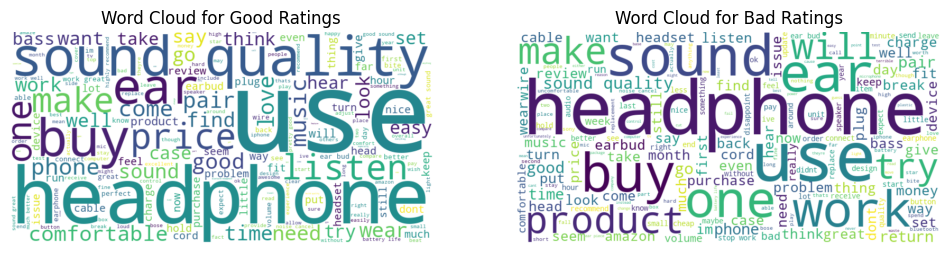

In [1]:
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

good_reviews_text = []
bad_reviews_text = []

with open('merged_reviews.json', 'r') as file:
    for line in file:
        try:
            data = json.loads(line)
            review_text = data['preprocessedReviewText']
            overall_rating = float(data['overall'])
            if overall_rating >= 3.0:
                good_reviews_text.append(review_text)
            else:
                bad_reviews_text.append(review_text)
        except json.JSONDecodeError as e:
            print("Error parsing JSON:", e)

good_reviews_text = ' '.join(good_reviews_text)
bad_reviews_text = ' '.join(bad_reviews_text)

good_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(good_reviews_text)
bad_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bad_reviews_text)

good_word_freq = Counter(good_reviews_text.split())
bad_word_freq = Counter(bad_reviews_text.split())

total_words = sum(good_word_freq.values()) + sum(bad_word_freq.values())

good_percentage = sum(good_word_freq.values()) / total_words * 100
bad_percentage = sum(bad_word_freq.values()) / total_words * 100

print(f"Percentage of words in Good Reviews Word Cloud: {good_percentage:.2f}%")
print(f"Percentage of words in Bad Reviews Word Cloud: {bad_percentage:.2f}%")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(good_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Good Ratings')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bad_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Bad Ratings')
plt.axis('off')

plt.show()


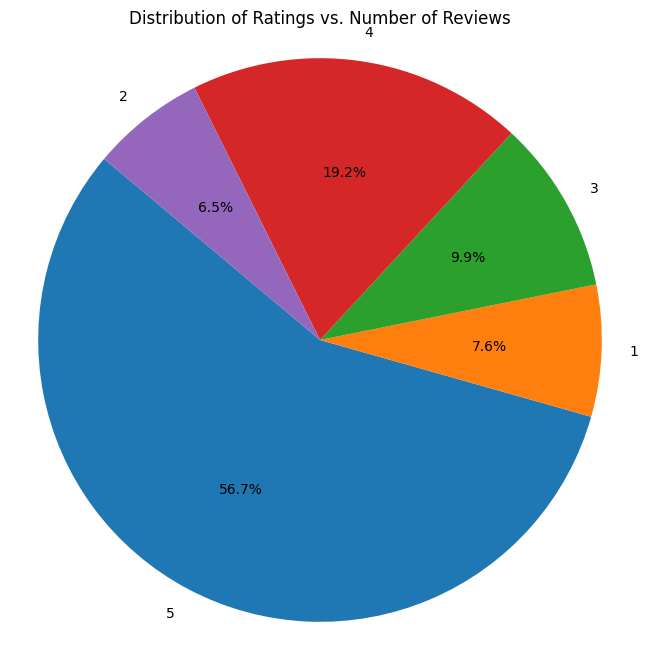

In [7]:
import json
import matplotlib.pyplot as plt
from collections import Counter

ratings_counter = Counter()

with open('merged_reviews.json', 'r') as file:
    for line in file:
        try:
            data = json.loads(line)
            overall_rating = int(data['overall'])
            ratings_counter[overall_rating] += 1
        except json.JSONDecodeError as e:
            print("Error parsing JSON:", e)

ratings = list(ratings_counter.keys())
review_counts = list(ratings_counter.values())

plt.figure(figsize=(8, 8))
plt.pie(review_counts, labels=ratings, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings vs. Number of Reviews')
plt.axis('equal')  
plt.show()

In [1]:
import json
from collections import defaultdict

reviews_count_by_year = defaultdict(int)
customers_count_by_year = defaultdict(set)

with open('merged_reviews.json', 'r') as file:
    for line in file:
        try:
            data = json.loads(line)
            review_time = data['reviewTime']
            customer_id = data['reviewerID']
            year = int(review_time[-4:])
            customers_count_by_year[year].add(customer_id)
            reviews_count_by_year[year] += 1
        except json.JSONDecodeError as e:
            print("Error parsing JSON:", e)

max_reviews_year = max(reviews_count_by_year, key=reviews_count_by_year.get)
max_customers_year = max(customers_count_by_year, key=lambda year: len(customers_count_by_year[year]))

print(f"The product received the maximum reviews in the year: {max_reviews_year}")
print(f"The year with the highest number of customers is: {max_customers_year}")


The product received the maximum reviews in the year: 2016
The year with the highest number of customers is: 2016


In [ ]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer

with open('merged_reviews.json') as f:
    data = json.load(f)

data_with_review_text = [review for review in data if 'preprocessedReviewText' in review]

processed_data = [review['preprocessedReviewText'] for review in data_with_review_text]
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_data)

tfketoken = {}
tfidf_word = {} 

for i, review in enumerate(processed_data):
    tokens = review['preprocessedReviewText']
    tfidf_word[i] = {token: tfidf_matrix[i, tfidf_vectorizer.vocabulary_.get(token)] for token in tokens}
    for token, tfidf_score in tfidf_word[i].items():
        tfketoken.setdefault(token, []).append(tfidf_score)
    review['word_tfidf'] = tfidf_word[i]

with open('final_final_tfidf.json', 'w') as f:
    for review in processed_data:
        json.dump(review, f)
        f.write('\n')

In [8]:
import json
from sklearn.model_selection import train_test_split

merged_data = []
with open('final_final_tfidf.json', 'r') as file:
    for line in file:
        try:
            data = json.loads(line)
            merged_data.append(data)
        except json.JSONDecodeError as e:
            print("Error parsing JSON:", e)

X = [data['word_tfidf'] for data in merged_data]
y = [1 if float(data['overall']) > 3 else 0 if float(data['overall']) == 3 else -1 for data in merged_data]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Train set size:", len(X_train))
print("Test set size:", len(X_test))

Train set size: 300959
Test set size: 100320


In [2]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

merged_data = []
with open('final_final_tfidf.json', 'r') as file:
    for line in file:
        try:
            data = json.loads(line)
            merged_data.append(data)
        except json.JSONDecodeError as e:
            print("Error parsing JSON:", e)

np.random.shuffle(merged_data)
num_entries = 100000
merged_data = merged_data[:num_entries]

X = [data['preprocessedReviewText'] for data in merged_data]
y = [1 if float(data['overall']) > 3 else 0 if float(data['overall']) == 3 else -1 for data in merged_data]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name, model in models.items():
    print(f"Evaluating {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    report = classification_report(y_test, y_pred, target_names=['Bad', 'Average', 'Good'])
    print(report)
    print("="*60)


Evaluating Logistic Regression...


c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         Bad       0.72      0.64      0.68      3433
     Average       0.47      0.17      0.25      2499
        Good       0.88      0.97      0.92     19068

    accuracy                           0.84     25000
   macro avg       0.69      0.59      0.62     25000
weighted avg       0.81      0.84      0.82     25000

Evaluating Decision Tree...
              precision    recall  f1-score   support

         Bad       0.45      0.45      0.45      3433
     Average       0.24      0.22      0.23      2499
        Good       0.86      0.86      0.86     19068

    accuracy                           0.74     25000
   macro avg       0.51      0.51      0.51     25000
weighted avg       0.74      0.74      0.74     25000

Evaluating Random Forest...
              precision    recall  f1-score   support

         Bad       0.84      0.22      0.35      3433
     Average       0.75      0.03      0.05      2499
        Good       

Q11

In [2]:
import pandas as pd
import json
merged_data = []
with open('final_final_tfidf.json', 'r') as file:
    for line in file:
        try:
            data = json.loads(line)
            merged_data.append(data)
        except json.JSONDecodeError as e:
            print("Error parsing JSON:", e)

df = pd.DataFrame(merged_data)

In [4]:
print(df.shape)

(401279, 15)


In [3]:
subset_df = df.head(50000)

user_item_matrix = subset_df.pivot_table(index='reviewerID', columns='asin', values='overall', fill_value=0)

In [15]:
user_item_matrix.shape

(43929, 651)

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_ratings = scaler.fit_transform(user_item_matrix)
normalized_ratings_df = pd.DataFrame(normalized_ratings, columns=user_item_matrix.columns, index=user_item_matrix.index)
print (normalized_ratings_df.shape)

(43929, 651)


In [17]:
from sklearn.neighbors import NearestNeighbors

def find_top_similar_users(similarity_matrix, N):
    top_similar_users = []
    for user_similarities in similarity_matrix:
        top_n_indices = np.argsort(user_similarities)[::-1][:N]
        top_similar_users.append(top_n_indices)
    return np.array(top_similar_users)

def calculate_mae(actual_ratings, predicted_ratings):
    return np.mean(np.abs(actual_ratings - predicted_ratings))

def kfold_validation_with_model(user_item_matrix, k, N):
    kf = KFold(n_splits=k)
    mae_scores = []

    for train_index, test_index in kf.split(user_item_matrix):
        train_set, test_set = user_item_matrix[train_index], user_item_matrix[test_index]

        model = NearestNeighbors(n_neighbors=N, metric='cosine')

        model.fit(train_set)

        _, neighbor_indices = model.kneighbors(test_set)

        predicted_ratings = np.mean(train_set[neighbor_indices], axis=1)

        mae = calculate_mae(test_set[test_set != 0], predicted_ratings[test_set != 0])
        mae_scores.append(mae)

    return np.mean(mae_scores)

user_item_matrix = normalized_ratings

N_values = [10, 20, 30, 40, 50]
K = 5

user_mae_results = {}
for N in N_values:
    mae = kfold_validation_with_model(user_item_matrix, K, N)
    user_mae_results[N] = mae

for N, mae in user_mae_results.items():
    print(f"N={N}: MAE={mae:.4f}")

N=10: MAE=0.2341
N=20: MAE=0.2436
N=30: MAE=0.2525
N=40: MAE=0.2597
N=50: MAE=0.2661


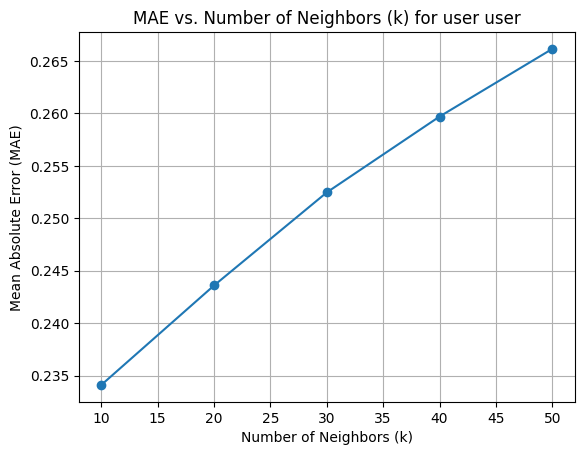

In [18]:
plt.plot(user_mae_results.keys (), user_mae_results.values (), marker='o')
plt.title('MAE vs. Number of Neighbors (k) for user user')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()

In [21]:
def item_item_recommendation_with_model(user_item_matrix, k, num_folds=5):
    kf = KFold(n_splits=num_folds)
    mae_scores = []

    for train_index, test_index in kf.split(user_item_matrix):
        train_set, test_set = user_item_matrix[train_index], user_item_matrix[test_index]

        model = NearestNeighbors(n_neighbors=k, metric='cosine')
        model.fit(train_set)

        _, neighbor_indices = model.kneighbors(test_set)

        predicted_ratings = np.mean(train_set[neighbor_indices], axis=1)

        mae = calculate_mae(test_set[test_set != 0], predicted_ratings[test_set != 0])
        mae_scores.append(mae)

    return np.mean(mae_scores)

user_item_matrix = normalized_ratings.T

K = 5

k_values = [10, 20, 30, 40, 50]
mae_results = {}
for k in k_values:
    mae = item_item_recommendation_with_model(user_item_matrix, k, K)
    mae_results[k] = mae

for k, mae in mae_results.items():
    print(f"k={k}: MAE={mae:.4f}")

k=10: MAE=0.8167
k=20: MAE=0.8193
k=30: MAE=0.8208
k=40: MAE=0.8218
k=50: MAE=0.8225


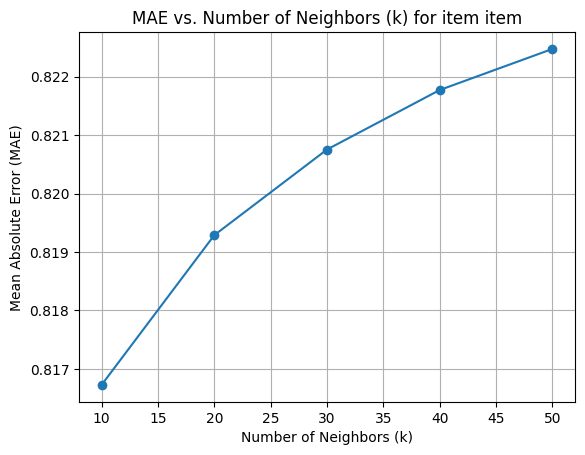

In [22]:
plt.plot(mae_results.keys (), mae_results.values (), marker='o')
plt.title('MAE vs. Number of Neighbors (k) for item item')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()

Q12

In [4]:
user_item_df = pd.DataFrame(user_item_matrix.T)
user_item_df['row_sum'] = user_item_df.sum(axis=1)
user_item_df_sorted = user_item_df.sort_values(by='row_sum', ascending=False)
print (user_item_df_sorted[["row_sum"]].head (10))

reviewerID      row_sum
asin                   
B000067RC4  8242.000000
B00004T8R2  7375.000000
B0002H02ZY  7050.000000
B000ULAP4U  6130.000000
B000WL6YY8  5715.000000
B00001P4ZH  5140.000000
B0007NWL70  5090.333333
B00001WRSJ  5089.000000
B0007XJSQC  4823.000000
B0001FTVEK  3745.000000


In [5]:
print (user_item_df['row_sum'])

asin
4126895493    144.0
B000001OMI    146.0
B000001OMR     21.0
B00000DMA3     19.0
B00000J1EJ    140.0
              ...  
B0015AE4C4     53.0
B0015AE4CE      8.0
B0015AFOL4     29.0
B0015AFONW      7.0
B0015AFWC0     74.0
Name: row_sum, Length: 651, dtype: float64
